https://pl.wikipedia.org/wiki/Dyskretna_transformacja_kosinusowa

http://grzegorzsokol.name/blog/dct/

https://pl.wikipedia.org/wiki/JPEG

In [1]:
import matplotlib.pyplot as plt

In [2]:
import scipy.fftpack as ff
import math
import numpy as np

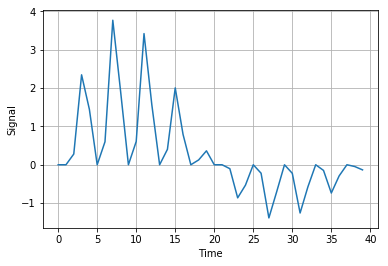

In [3]:
signal = [1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4]

for i in range(40):
    signal[i] = math.exp(-2.0*i/40)*(signal[i]^2)*math.sin(i*2.0*math.pi/40)

fig, ax = plt.subplots()

ax.set_ylabel('Signal')
ax.set_xlabel('Time')
ax.grid(True)
ax.plot(signal)
plt.show()

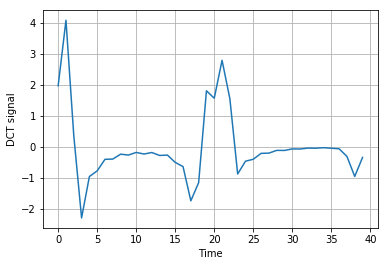

In [4]:
dct_signal = ff.dct(signal, norm='ortho')

fig, ax = plt.subplots()

ax.set_ylabel('DCT signal')
ax.set_xlabel('Time')
ax.grid(True)
ax.plot(dct_signal)
plt.show()

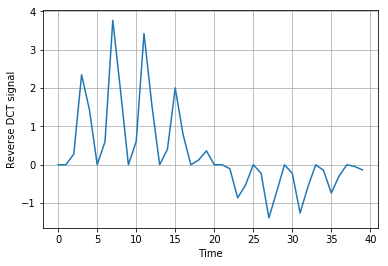

In [5]:
reverse_dct = ff.idct(dct_signal, norm='ortho')

fig, ax = plt.subplots()

ax.set_ylabel('Reverse DCT signal')
ax.set_xlabel('Time')
ax.grid(True)
ax.plot(reverse_dct)
plt.show()

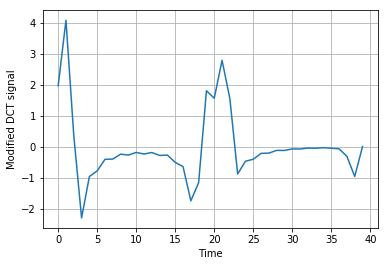

In [6]:
dct_signal_modified = dct_signal[:]
dct_signal_modified[len(dct_signal)-1] = 0

fig, ax = plt.subplots()

ax.set_ylabel('Modified DCT signal')
ax.set_xlabel('Time')
ax.grid(True)
ax.plot(dct_signal_modified)
plt.show()

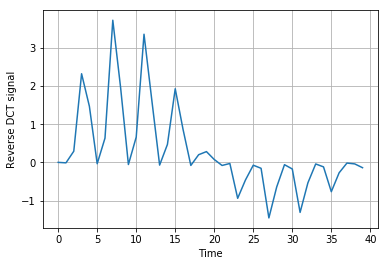

In [7]:
reverse_dct_modified = ff.idct(dct_signal, norm='ortho')

fig, ax = plt.subplots()

ax.set_ylabel('Reverse DCT signal')
ax.set_xlabel('Time')
ax.grid(True)
ax.plot(reverse_dct_modified)
plt.show()

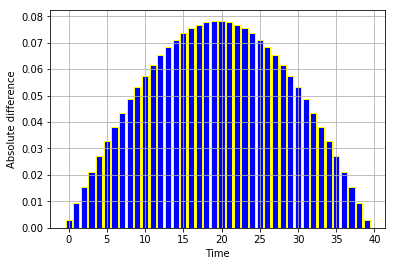

In [8]:
diff = abs(signal-reverse_dct_modified)

fig, ax = plt.subplots()

ax.set_ylabel('Absolute difference')
ax.set_xlabel('Time')
ax.grid(True)
ax.bar(range(40),diff,color="blue",edgecolor='yellow')
plt.show()

DCT :: Discrete Cosine Transform :: JPEG lossy compression (sketch)

In [9]:
t = np.array([
        [52,55,61,66,70,61,64,73],
        [63,59,55,90,109,85,69,72],
        [62,59,68,113,144,104,66,73],
        [63,58,71,122,154,106,70,69],
        [67,61,68,104,126,88,68,70],
        [79,65,60,70,77,68,58,75],
        [85,71,64,59,55,61,65,83],
        [87,79,69,68,65,76,78,94]
    ])
tt = t - 128

print(tt)

[[-76 -73 -67 -62 -58 -67 -64 -55]
 [-65 -69 -73 -38 -19 -43 -59 -56]
 [-66 -69 -60 -15  16 -24 -62 -55]
 [-65 -70 -57  -6  26 -22 -58 -59]
 [-61 -67 -60 -24  -2 -40 -60 -58]
 [-49 -63 -68 -58 -51 -60 -70 -53]
 [-43 -57 -64 -69 -73 -67 -63 -45]
 [-41 -49 -59 -60 -63 -52 -50 -34]]


In [10]:
tt2 = np.transpose(tt)
print(tt2)

[[-76 -65 -66 -65 -61 -49 -43 -41]
 [-73 -69 -69 -70 -67 -63 -57 -49]
 [-67 -73 -60 -57 -60 -68 -64 -59]
 [-62 -38 -15  -6 -24 -58 -69 -60]
 [-58 -19  16  26  -2 -51 -73 -63]
 [-67 -43 -24 -22 -40 -60 -67 -52]
 [-64 -59 -62 -58 -60 -70 -63 -50]
 [-55 -56 -55 -59 -58 -53 -45 -34]]


In [11]:
print(tt[0])

[-76 -73 -67 -62 -58 -67 -64 -55]


In [12]:
res = ff.dct(ff.dct(tt,norm='ortho').T,norm='ortho').T
np.set_printoptions(suppress=True)
print(np.round(res,2))

[[-415.38  -30.19  -61.2    27.24   56.13  -20.1    -2.39    0.46]
 [   4.47  -21.86  -60.76   10.25   13.15   -7.09   -8.54    4.88]
 [ -46.83    7.37   77.13  -24.56  -28.91    9.93    5.42   -5.65]
 [ -48.53   12.07   34.1   -14.76  -10.24    6.3     1.83    1.95]
 [  12.12   -6.55  -13.2    -3.95   -1.88    1.75   -2.79    3.14]
 [  -7.73    2.91    2.38   -5.94   -2.38    0.94    4.3     1.85]
 [  -1.03    0.18    0.42   -2.42   -0.88   -3.02    4.12   -0.66]
 [  -0.17    0.14   -1.07   -4.19   -1.17   -0.1     0.5     1.68]]


In [13]:
orig = ff.idct(ff.idct(res,norm='ortho').T,norm='ortho').T
print(orig)

[[-76. -73. -67. -62. -58. -67. -64. -55.]
 [-65. -69. -73. -38. -19. -43. -59. -56.]
 [-66. -69. -60. -15.  16. -24. -62. -55.]
 [-65. -70. -57.  -6.  26. -22. -58. -59.]
 [-61. -67. -60. -24.  -2. -40. -60. -58.]
 [-49. -63. -68. -58. -51. -60. -70. -53.]
 [-43. -57. -64. -69. -73. -67. -63. -45.]
 [-41. -49. -59. -60. -63. -52. -50. -34.]]


In [14]:
res2 = np.round(res[:],2)
bias = 3
windowsize = 8

for i in range(windowsize):
    for j in range(windowsize):
        if res2[i,j]>-bias and res2[i,j]<bias:
            res2[i,j]=0
            
np.set_printoptions(suppress=True)
print(res2)

[[-415.38  -30.19  -61.2    27.24   56.13  -20.1     0.      0.  ]
 [   4.47  -21.86  -60.76   10.25   13.15   -7.09   -8.54    4.88]
 [ -46.83    7.37   77.13  -24.56  -28.91    9.93    5.42   -5.65]
 [ -48.53   12.07   34.1   -14.76  -10.24    6.3     0.      0.  ]
 [  12.12   -6.55  -13.2    -3.95    0.      0.      0.      3.14]
 [  -7.73    0.      0.     -5.94    0.      0.      4.3     0.  ]
 [   0.      0.      0.      0.      0.     -3.02    4.12    0.  ]
 [   0.      0.      0.     -4.19    0.      0.      0.      0.  ]]


In [15]:
orig2 = ff.idct(ff.idct(res2,norm='ortho').T,norm='ortho').T
print(np.round(orig2))

[[-76. -74. -68. -61. -57. -66. -66. -54.]
 [-65. -68. -71. -39. -21. -44. -58. -57.]
 [-65. -70. -60. -15.  16. -23. -62. -55.]
 [-66. -72. -56.  -6.  27. -21. -60. -58.]
 [-60. -66. -60. -24.  -4. -40. -61. -57.]
 [-49. -63. -68. -58. -51. -59. -69. -54.]
 [-45. -57. -65. -67. -74. -67. -63. -44.]
 [-40. -50. -57. -62. -63. -51. -51. -34.]]


In [16]:
diff2 = abs(tt-np.round(orig2))
print(np.round(diff2,2))

[[0. 1. 1. 1. 1. 1. 2. 1.]
 [0. 1. 2. 1. 2. 1. 1. 1.]
 [1. 1. 0. 0. 0. 1. 0. 0.]
 [1. 2. 1. 0. 1. 1. 2. 1.]
 [1. 1. 0. 0. 2. 0. 1. 1.]
 [0. 0. 0. 0. 0. 1. 1. 1.]
 [2. 0. 1. 2. 1. 0. 0. 1.]
 [1. 1. 2. 2. 0. 1. 1. 0.]]
